<a href="https://colab.research.google.com/github/MatewosTegete/PRODIGY_DS_02/blob/main/Prodigy_DS_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2: Performing Cleaning, EDA and Identifying Patterns on the Titanic Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Prodigy_InfoTech/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis (EDA)**

In [ ]:
df = pd.DataFrame(data)
male_data = df[df['Sex'] == 'male']
male_death_rate = (1 - male_data['Survived'].mean()) * 100
print("The male death rate is ", male_death_rate, "%")
print("The percentage of men who survived are ", 100 - male_death_rate, "%")

The male death rate is  81.10918544194108 %
The percentage of men who survived are  18.89081455805892 %


In [ ]:
df = pd.DataFrame(data)
female_data = df[df['Sex'] == 'female']
female_death_rate = (1 - female_data['Survived'].mean()) * 100
print("The female death rate is ", female_death_rate, "%")
print("The percentage of female who survived are ", 100 - female_death_rate, "%")

The female death rate is  25.79617834394905 %
The percentage of female who survived are  74.20382165605095 %


**Data Cleaning**

In [ ]:
nan_df = df.isna()
print(nan_df)

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
mean_data = numeric_df.mean()
numeric_df.fillna(mean_data, inplace = True)
# Through this we have eliminated null values from Age by filling the missing elements of the column with mean values

In [ ]:
print(numeric_df.Age.isna().sum())


0


**Relationship between Variables**

In [ ]:
# The relationship between Age and Survival
age_groups = pd.cut(numeric_df['Age'], range(0, 101, 10))  # Adjusting upper bound to 101
numeric_df['Age Group'] = age_groups
grouped_data = numeric_df.groupby('Age Group')['Survived'].value_counts().unstack(fill_value=0)
print(grouped_data)

Survived     0    1
Age Group          
(0, 10]     26   38
(10, 20]    71   44
(20, 30]   271  136
(30, 40]    86   69
(40, 50]    53   33
(50, 60]    25   17
(60, 70]    13    4
(70, 80]     4    1
(80, 90]     0    0
(90, 100]    0    0


The above is a comprehensive analysis of age groups and their casualities and survivors. Let's go further to see which age group had the largest percentage of Survivors

In [ ]:
# Calculating survival rate for each group
survival_rate = (numeric_df.groupby('Age Group')['Survived']
                  .sum() / numeric_df.groupby('Age Group')['Survived'].count()) * 100

# Finding the age group with the highest survival rate
highest_survival_group = survival_rate.idxmax()
highest_survival_rate = survival_rate.max()
print(f"Age group with the largest percentage of survivors: {highest_survival_group}")
print(f"Survival rate: {highest_survival_rate:.2f}%")

# Calculate number of survivors in that group
survivors_count = (numeric_df[numeric_df['Age Group'] == highest_survival_group]
                   ['Survived'].sum())
print(f"Number of survivors in the group: {survivors_count}")

Age group with the largest percentage of survivors: (0, 10]
Survival rate: 59.38%
Number of survivors in the group: 38


Up Next, let's visualize age groups and survival rate by percentage values

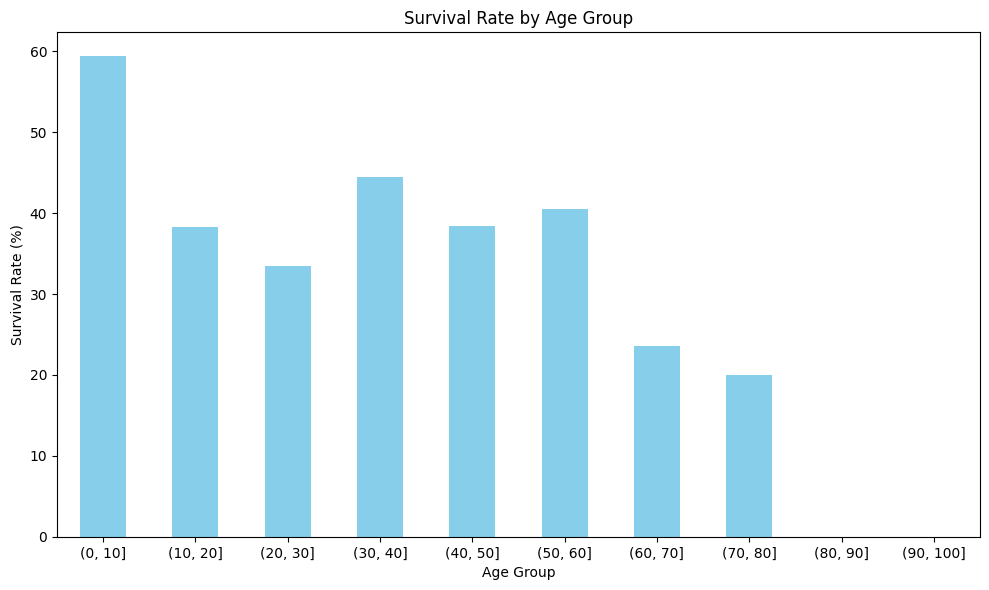

In [ ]:
plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Identifying Patterns and Trends

This could be done by making a prediction on the test_csv file

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Prodigy_InfoTech/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(data[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})


In [ ]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


So we have successfully predicted the survivors in the test.csv file